## Navier-Stokes DNS code

This is a pseudospectral code for solving the 2D Navier-Stokes. 

The incompressible Navier-Stokes equations with Kolmogorov forcing are given by

$$\frac{\partial \mathbf u^*}{\partial t^*} + \mathbf u^* \cdot \nabla^* \mathbf u^* +\frac{1}{\rho}\nabla^*p^*  = \nu \Delta^* \mathbf u^* + \chi\sin(2\pi n y^*/L_y) \hat{\mathbf x} $$

$$\nabla^* \cdot \mathbf u^*  =0 $$

where $\mathbf u = u \hat{\mathbf x}+v \hat{\mathbf y}=(u,v)$ is the two-dimensional velocity field, $n$ is the forcing wavenumber, $\chi$ the forcing amplitude, $\nu$ kinematic viscosity, $p$ pressure and $\rho$ is the density of the fluid defined over the doubly periodic domain $(x,y) \in [0,L_x]\times[0,L_y]$. The system is then naturally non-dimensionalised with lengthscale $L_y/2\pi$ and timescale $\sqrt{L_y/2\pi\chi}$ to give
$$
\frac{\partial \mathbf u}{\partial t} + \mathbf u\cdot\nabla\mathbf u +\nabla p = \frac{1}{Re} \Delta \mathbf u + \sin (n y) \hat{\mathbf x}\label{NSu}$$
$$\nabla\cdot \mathbf u =0 $$

where we define the Reynolds number
\begin{equation}
Re := \frac{\sqrt{\chi}}{\nu}\left(\frac{L_y}{2\pi}\right)^{3/2}.
\end{equation}
The equations are  solved over $[0,2\pi/\alpha]\times[0,2\pi]$ where $\alpha = L_y/L_x$ defines the aspect ratio of the domain. 

For computational efficiency and accuracy we reformulate so that vorticity $\omega := \nabla \times \mathbf u$ is our prognostic variable and solve

\begin{align}\label{NS}
\frac{\partial \omega}{\partial t} + \mathbf u\cdot\nabla \omega &= \frac{1}{Re} \Delta \omega -n \cos (n y).
\end{align}

Formulation is vorticity-velocity (not velocity-pressure)

RK4 timestepping for everything except the viscous term which is Crank-Nicolson. 

Timestepping occurs in spectral (Fourier) space.

Dealiasing is by the 2/3rds rule.

Kolmogorov flow body forcing is implemented.

More comments and description needs to be added!

First cell performs all the set-up and input parameters

In [1]:
# Import all the usual modules
#-------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import scipy.integrate as intg
import glob
from mpl_toolkits.mplot3d import Axes3D
#-------------------------------------
import parameters as p  
import functions as f   
#-------------------------------------

# Forcing wavenumber
n = 4
Re = 60

# Time & final time
t = 0.
T = 200.0
q=0

#timestep 
dt = 0.005
#Resolution
Nx = 128
Ny = 128

#Length of domain
Lx = 2*np.pi
Ly = 2*np.pi

#-------------------------------------
#-------------------------------------

# Set everything up in advance, and the initial condition
u = f.init(Nx,Ny,Lx,Ly,n,dt,Re)

#variables used for plotting animation (check this is the best implementation)
iplot = 0
tmax = int(T/dt)

nsnaps = 101
nstep = int(np.floor(T/dt))
pstep = int(np.ceil(nstep/(nsnaps)))

unew = np.zeros((Ny,Nx//2+1),dtype=complex)
uplot = np.zeros((Ny,Nx,nsnaps))

Eng = np.zeros(int(T/dt),dtype=float)
Dis = np.zeros(int(T/dt),dtype=float)
Pow = np.zeros(int(T/dt),dtype=float)

elam = (Re**2)/(4**5)     #calculating the laminar energy and dissipation values
dlam = Re/(2*(4**2))

Time = np.arange(0,tmax,1)

### Here's the timestep cell

In [2]:
for i in range(nstep//2):
    unew = p.cn1*((p.cn2*u) + f.rk4(u))   # timestep update
    
    #----- Energy and Dissipation timestepping 
    
    Eng[i] = f.Energy(unew,OnFlag = 0)    #doing the sum on enery timestep
    Dis[i] = f.Diss(unew,Re,OnFlag = 1)  
    Pow[i] = f.Power(unew,n,OnFlag = 1)
    
    #----- Input enegry timestepping
     
    #--- Plot saving
        
    if(int(t/dt) % pstep == 0): # Save for plotting
        uplot[:,:,iplot] = np.fft.irfft2(unew[:,:])*(Nx*Ny) 
        iplot = iplot+1
    
    u = unew       
    t = t + dt 

## Plotting Vorticity 


In [3]:
f.SlidePlot(uplot,Nx,Ny,Lx,Ly,iplot,pstep,t,T,dt)

interactive(children=(FloatSlider(value=49.625, description='t', max=99.25, step=1.985), Output()), _dom_class…

Interactive animation above is of vorticity

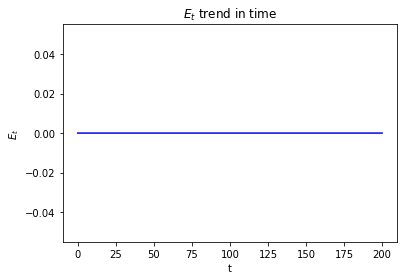

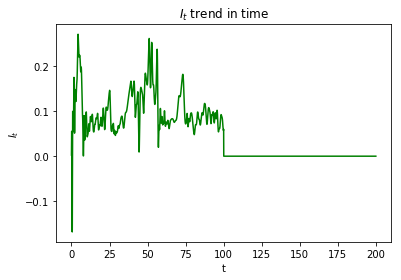

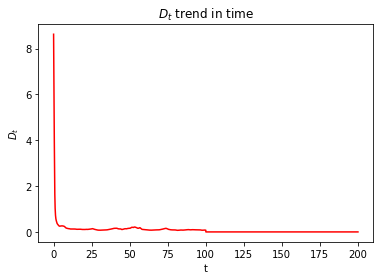

In [4]:
f.Energyplot(Time,Eng,dt)
f.Powerplot(Time,Pow,dt)
f.Dissplot(Time,Dis,dt)

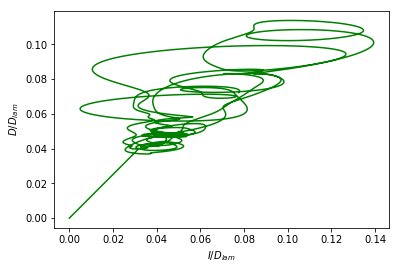

In [5]:
f.Phaseplot(Pow,Dis,dlam,tmax)